<a href="https://colab.research.google.com/github/Erica2222/CCDATSCL_Exercises_221-ML-/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [22]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [23]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [24]:
df_exam_scores['Method'].value_counts()

,count
Method,
A,17
B,17
C,16


Compute the mean and standard deviation of exam scores for each group.

In [25]:
df_exam_scores.groupby('Method')['Score'].agg(['mean', 'std'])

,mean,std
Method,,
A,78.588235,2.575336
B,86.294118,2.365500
C,71.937500,1.768945


Use a plot to show the exam scores by teaching method.

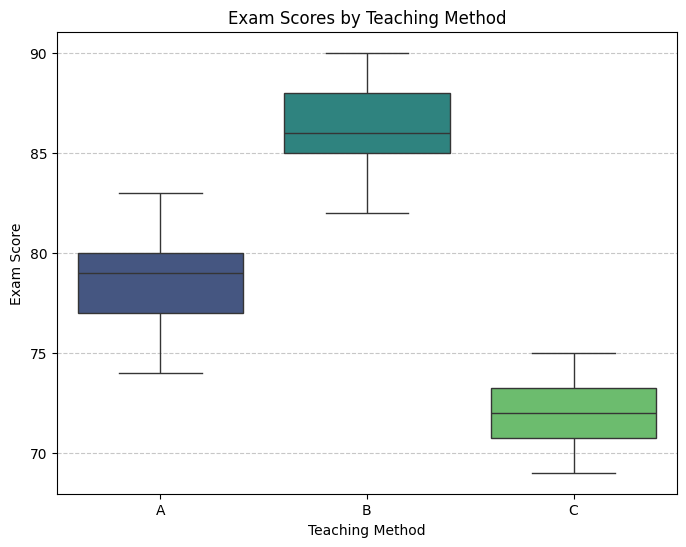

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Method', y='Score', data=df_exam_scores, palette='viridis', hue='Method', legend=False)
plt.title('Exam Scores by Teaching Method')
plt.xlabel('Teaching Method')
plt.ylabel('Exam Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [27]:
# Extract exam scores for each method
method_A_scores = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
method_B_scores = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
method_C_scores = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(method_A_scores, method_B_scores, method_C_scores)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
print(f"Significance level (α): {alpha}")

if p_value < alpha:
    print("Conclusion: Since p-value < α, we reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference in mean exam scores among the three teaching methods.")
elif p_value > alpha:
    print("Conclusion: Since p-value > α, we fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant difference in mean exam scores among the three teaching methods.")
else:
    print("Conclusion: p-value is equal to α, which is a borderline case. More data or a different alpha might be needed.")

F-statistic: 165.1785
P-value: 0.0000
Significance level (α): 0.05
Conclusion: Since p-value < α, we reject the null hypothesis.
This suggests that there is a statistically significant difference in mean exam scores among the three teaching methods.


Interpret the results. What does it say about the relationship between teaching method and exam scores?

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [28]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [29]:
print(df_littering_data['Gender'].value_counts())
print(df_littering_data['Litter'].value_counts())

Gender
Male      20
Female    20
Name: count, dtype: int64
Litter
No     22
Yes    18
Name: count, dtype: int64


Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [30]:
contingency_table = pd.crosstab(df_littering_data['Gender'], df_littering_data['Litter'])
print(contingency_table)

# Calculate row totals
row_totals = contingency_table.sum(axis=1)
print(f"\nRow Totals:\n{row_totals}")

# Calculate column totals
col_totals = contingency_table.sum(axis=0)
print(f"\nColumn Totals:\n{col_totals}")

# Calculate grand total
grand_total = contingency_table.sum().sum()
print(f"\nGrand Total: {grand_total}")

Litter  No  Yes
Gender         
Female  14    6
Male     8   12

Row Totals:
Gender
Female    20
Male      20
dtype: int64

Column Totals:
Litter
No     22
Yes    18
dtype: int64

Grand Total: 40


State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [31]:
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {degrees_of_freedom}")

alpha = 0.05
print(f"\nSignificance level (α): {alpha}")

if p_value < alpha:
    print("Conclusion: Since p-value < α, we reject the null hypothesis.")
    print("This suggests that there is a statistically significant association between gender and littering behavior.")
elif p_value > alpha:
    print("Conclusion: Since p-value > α, we fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant association between gender and littering behavior.")
else:
    print("Conclusion: p-value is equal to α, which is a borderline case. More data or a different alpha might be needed.")

Chi-squared statistic: 2.5253
P-value: 0.1120
Degrees of freedom: 1

Significance level (α): 0.05
Conclusion: Since p-value > α, we fail to reject the null hypothesis.
This suggests that there is no statistically significant association between gender and littering behavior.


Interpret your results. Is there evidence that gender and littering behavior are associated?